y변수에 영향력을 주지 않은 경우

# 데이터 및 라이브러리 불러와서 확인하기

In [1]:
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

font_fname = r'C:\Users\h2est\AppData\Local\Microsoft\Windows\Fonts\MaruBuri-SemiBold.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

In [2]:
import warnings
import pandas as pd

pd.set_option('display.max_row', 55)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
from sklearn import metrics
import numpy as np

def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(len(preds[0])): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

# Feature tools로 변수 조작하기

In [4]:
# 설치 후 재시작 필요 (로컬에서는 한 번만)
# !pip install featuretools 
import featuretools as ft

from featuretools.selection import (
    remove_highly_correlated_features,
    remove_single_value_features,
)


In [5]:
import os
from os.path import join as pjoin
data_dir = os.getcwd()

file_path = {
    'train_data' : pjoin(data_dir, 'train.csv'),
    'test_data' : pjoin(data_dir, 'test.csv')
}

In [6]:
current_path = os.getcwd()

# feature tools에서 조작을 위해 컬럼명 변경 진행 안하고 시작

train_df = pd.read_csv(file_path['train_data'])
test_df = pd.read_csv(file_path['test_data'])

# 훈련데이터 프레임 컬럼명을 바꿔주기
x_features = pd.read_csv(current_path + '/meta/x_feature_info.csv')['설명'].values
x_features = ['ID'] + list(x_features)
y_features = pd.read_csv(current_path + '/meta/y_feature_info.csv')['설명'].values
y_features = list(y_features)

# train_df = train_df.set_index(train_df.columns[0])
train_df.rename(columns= {c:"x_"+xf for c, xf in zip(train_df.columns[:len(x_features)], x_features)}, inplace=True)
train_df.rename(columns= {c:"y_"+yf for c, yf in zip(train_df.columns[len(x_features):], y_features)}, inplace=True)

# test_df = test_df.set_index(test_df.columns[0])
test_df.rename(columns= {c:"x_"+xf for c, xf in zip(test_df.columns[:len(x_features)], x_features)}, inplace=True)

train_df.rename(columns= {'x_ID':'ID'}, inplace=True)
test_df.rename(columns= {'x_ID':'ID'}, inplace=True)

train_df.head()

,ID,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,0.0,0.0,4.34,0.18,13.34,13.37,13.40,13.52,13.44,3.11,3.17,3.06,3.13,1,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,12.99,12.88,12.89,12.99,-16.41,-16.36,-17.03,21.20,20.99,21.28,21.09,0.29,1463,1,1,9706.03,137.043591,135.359219,147.837968,134.313475,125.605427,136.721425,125.028256,2.056,1.456,1.680,10.502,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,0.0,4.38,0.18,13.33,13.33,13.46,13.51,13.42,2.97,3.11,2.91,3.20,1,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,12.92,12.87,12.89,12.93,-16.06,-16.11,-16.74,21.16,21.03,21.16,21.13,0.13,1463,1,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.446,1.184,1.268,18.507,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,0.0,4.36,0.15,13.36,13.36,13.39,13.51,13.43,3.04,3.04,3.01,3.12,1,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,12.97,12.87,12.87,13.00,-16.16,-16.17,-16.76,21.13,21.03,21.17,21.12,0.14,1468,1,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.251,0.665,0.782,14.082,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,0.0,4.33,0.21,13.30,13.33,13.39,13.51,13.40,3.05,3.01,3.02,3.08,1,2.06,2.05,2.03,2.06,2.07,2.12,1.47,1.68,1.47,1.68,12.91,12.97,12.99,12.92,-16.05,-16.03,-16.67,21.18,20.98,21.20,21.09,0.22,1469,1,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.464,1.079,1.052,16.975,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,0.0,4.35,0.16,13.35,13.34,13.41,13.50,13.42,3.04,3.07,3.00,3.12,1,2.09,2.06,2.09,2.12,2.33,2.13,1.49,1.68,1.47,1.82,12.96,12.85,12.91,12.96,-16.25,-16.23,-16.85,21.16,20.96,21.18,21.10,0.22,1469,1,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,0.983,0.646,0.689,15.047,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [7]:
test_df.head()

,ID,x_PCB 체결 시 단계별 누름량(Step 1),x_PCB 체결 시 단계별 누름량(Step 2),x_방열 재료 1 무게,x_1차 검사 통과 여부,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_2차 검사 통과 여부,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_3차 검사 통과 여부,x_4차 검사 통과 여부,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,1,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.17,-16.17,-16.84,21.22,21.06,21.21,21.20,0.16,1469,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,1,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.35,-15.25,-16.01,21.21,20.99,21.26,21.15,0.27,1462,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,0.0,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,1,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.27,-16.35,-16.95,21.16,21.05,21.15,21.19,0.14,1469,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,0.0,4.39,0.18,13.32,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,1,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.06,-16.13,-16.75,21.15,21.03,21.16,21.14,0.13,1469,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,1,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.06,-16.17,-16.76,21.15,21.08,21.12,21.17,0.09,1469,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [8]:
import numpy as np 

# 누름량이 소수가 나오기는 어렵다고 판단하여 소수값이 아닌 정수 값을 갖도록 바꿔주기
train_df[train_df.filter(regex='누름량').columns] = train_df.filter(regex='누름량').apply(lambda x: round(x)).astype(np.int32)
test_df[test_df.filter(regex='누름량').columns] = test_df.filter(regex='누름량').apply(lambda x: round(x)).astype(np.int32)

float_cols = train_df.dtypes[train_df.dtypes == 'float'].index
int_cols = train_df.dtypes[train_df.dtypes == 'int'].index

train_df[float_cols] = train_df[float_cols].astype(np.float32)
train_df[int_cols] = train_df[int_cols].astype(np.int32)

float_cols1 = test_df.dtypes[test_df.dtypes == 'float'].index
int_cols1 = test_df.dtypes[test_df.dtypes == 'int'].index

test_df[float_cols1] = test_df[float_cols1].astype(np.float32)
test_df[int_cols1] = test_df[int_cols1].astype(np.int32)

In [9]:
es = ft.EntitySet('train_data')
es = es.add_dataframe(
    dataframe_name = 'train_df',
    dataframe = train_df.drop(columns=['ID'], axis=1),
    index = train_df.columns[0],
)

es

Entityset: train_data
  DataFrames:
    train_df [Rows: 39607, Columns: 71]
  Relationships:
    No relationships

In [10]:
es1 = ft.EntitySet('test_data')
es1 = es1.add_dataframe(
    dataframe_name = 'test_df',
    dataframe = test_df.drop(columns=['ID'], axis=1),
    index = test_df.columns[0],
)

es1

Entityset: test_data
  DataFrames:
    test_df [Rows: 39608, Columns: 57]
  Relationships:
    No relationships

In [11]:
fm, features = ft.dfs(
    entityset=es,
    target_dataframe_name='train_df',
    features_only=False,
    agg_primitives=[],
    trans_primitives=[],
    max_depth=1,
    verbose=True,
    # primitive_options={ 
    #     ('mean', 'std'): {
    #         "include_groupby_columns": {
    #             "train_data": list(es.dataframes[0].filter(regex='x').columns)
    #             },
    #         'ignore_columns' : {
    #             "train_data": list(es.dataframes[0].filter(regex='y').columns)
    #             },
    #     }
    # }
)
features

Built 70 features
Elapsed: 00:00 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [12]:
new_fm, new_features = remove_single_value_features(fm, features=features)
set(features) - set(new_features)

{<Feature: x_3차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>}

In [13]:
new_fm, new_features = remove_highly_correlated_features(
    new_fm, features=new_features, pct_corr_threshold=0.85, features_to_check = list(new_fm.filter(regex='x').columns), 
    features_to_keep = list(es.dataframes[0].filter(regex='y').columns)
)
set(features) - set(new_features) 

{<Feature: x_3차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>}

In [14]:
from featuretools.selection import remove_low_information_features
new_fm, new_features = remove_low_information_features(new_fm, features=new_features)
set(features) - set(new_features) 

{<Feature: x_3차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>}

In [15]:
avg_rpm = [np.mean(new_fm.iloc[i].filter(regex = '회전수')) for i in range(len(new_fm))]
new_fm['x_스크류 체결 시 분당 회전수(평균)'] = avg_rpm
new_fm[new_fm.filter(regex='대기 시간').columns] = new_fm.filter(regex='대기 시간').apply(lambda x:round(x//3600)).astype(np.int32)
new_fm.drop(columns = new_fm.filter(regex = '회전수').columns[:-1], axis=1, inplace=True)
new_fm.drop(columns = new_fm.filter(regex = '차이|기울기').columns, axis=1, inplace=True)

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

rb_scaler = RobustScaler()
new_fm[new_fm.filter(regex='납 량|소요량|면적').columns] = rb_scaler.fit_transform(new_fm.filter(regex='납 량|소요량|면적'))

mms = MinMaxScaler()
new_fm[['x_방열 재료 1 무게']] = mms.fit_transform(new_fm[['x_방열 재료 1 무게']])
new_fm.drop(columns = ['x_방열 재료 2 무게'], axis=1, inplace=True)

In [16]:
new_fm, new_features = remove_single_value_features(new_fm, features=new_features)
set(features) - set(new_features) 

{<Feature: x_3차 검사 통과 여부>,
 <Feature: x_스크류 체결 시 분당 회전수 4>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_스크류 체결 시 분당 회전수 3>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_안테나 부분 레이돔 기울기>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 체결 시 분당 회전수 2>,
 <Feature: x_방열 재료 2 무게>}

In [17]:
fm1, features1 = ft.dfs(
    entityset=es1,
    target_dataframe_name='test_df',
    features_only=False,
    agg_primitives=[],
    trans_primitives=[],
    max_depth=1,
    verbose=True,
    # primitive_options={ 
    #     ('mean', 'std'): {
    #         "include_groupby_columns": {
    #             "test_data": list(es1.dataframes[0].filter(regex='x').columns)
    #             },
    #     }
    # }
)
features1

Built 56 features
Elapsed: 00:00 | Progress: 100%|██████████


[<Feature: x_PCB 체결 시 단계별 누름량(Step 1)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_방열 재료 1 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 3)>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 4)>,
 <Feature: x_방열 재료 1 면적>,
 <Feature: x_방열 재료 2 면적>,
 <Feature: x_방열 재료 3 면적>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_커넥터 위치 기준 좌표>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_1번 안테나 패드 위치>,
 <Feature: x_2번 안테나 패드 위치>,
 <Feature: x_3번 안테나 패드 위치>,
 <Feature: x_4번 안테나 패드 위치>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_1번 스크류 삽입 깊이>,
 <Feature: x_2번 스크류 삽입 깊이>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_4번 스크류 삽입 깊이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_커넥터 1번 핀 치수>,
 <Feature: x_커넥터 2번 핀 치수>,
 <Feature: x_커넥터 3번 핀 치수>,
 <Feature: x_커넥터 4번 핀 치수>,
 <Feature: x_커넥터 5번 핀 치수>,
 <Feature: x_커넥터 6번 핀 치수>,
 <Feature: x_스크류 삽입 깊이1>,
 <Feature: x_스크류 삽입 깊이2>,
 <Feature: x_스크류 삽입 깊이3>,
 <Feature: x_스크류 삽입 깊이4>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 

In [18]:
new_fm1, new_features1 = remove_single_value_features(fm1, features=features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_방열 재료 3 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_5번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_3번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,76.669998,102,74,30.510000,63.570000,239.800003,0.0,0.0,4.37,0.15,13.38,13.40,13.50,13.53,13.46,3.27,3.32,3.18,3.39,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.170000,-16.170000,-16.840000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688
1,67,69.370003,102,68,28.030001,116.989998,189.229996,0.0,0.0,4.36,0.17,13.35,13.38,13.45,13.52,13.44,3.26,3.30,3.17,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.350000,-15.250000,-16.010000,21.209999,20.990000,21.260000,21.150000,0.27,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619
2,70,68.970001,102,77,29.650000,205.679993,214.929993,0.0,0.0,4.43,0.20,13.32,13.35,13.40,13.52,13.41,3.07,3.12,3.05,3.17,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.270000,-16.350000,-16.950001,21.160000,21.049999,21.150000,21.190001,0.14,1469,14860.830078,120.447449,119.988808,132.099915,120.450157,130.051712,128.252975,114.475632
3,70,65.870003,102,74,28.150000,103.379997,180.800003,0.0,0.0,4.39,0.18,13.32,13.34,13.45,13.50,13.42,3.23,3.11,3.20,3.14,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.059999,-16.129999,-16.750000,21.150000,21.030001,21.160000,21.139999,0.13,1469,15252.530273,133.994690,125.069183,147.507675,123.142654,125.963661,139.666595,126.589256
4,74,66.669998,102,75,29.920000,71.199997,231.929993,0.0,0.0,4.38,0.12,13.38,13.39,13.45,13.50,13.46,3.17,3.20,3.04,3.20,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.059999,-16.170000,-16.760000,21.150000,21.080000,21.120001,21.170000,0.09,1469,10752.230469,137.918198,135.116196,138.600479,127.173035,137.252716,134.411331,124.020020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,69,63.970001,103,69,29.490000,116.349998,284.160004,0.0,0.0,4.35,0.14,13.38,13.37,13.48,13.51,13.45,3.16,3.06,3.07,3.09,2.13,2.08,2.09,2.07,2.12,2.16,1.37,1.66,1.36,1.56,12.98,13.00,12.91,12.90,-16.170000,-16.260000,-16.879999,21.160000,21.129999,21.240000,21.190001,0.11,1469,62123.531250,127.741249,126.494308,139.119904,125.271111,128.284576,140.176941,128.292847
39604,69,61.369999,103,69,32.290001,116.279999,272.410004,0.0,0.0,4.34,0.16,13.37,13.38,13.47,13.53,13.46,3.18,2.98,3.09,3.06,2.06,2.05,2.05,2.08,2.08,2.14,1.36,1.64,1.36,1.68,12.92,12.95,12.99,13.00,-16.110001,-16.100000,-16.730000,21.160000,21.030001,21.219999,21.120001,0.19,1469,61844.128906,127.767380,124.062813,138.238663,119.879395,127.322533,137.312042,131.570618
39605,70,63.669998,103,70,30.000000,113.050003,295.540009,0.0,0.0,4.38,0.16,13.36,13.36,13.46,13.52,13.44,3.18,3.02,3.09,3.07,2.11,2.13,2.06,2.11,2.12,2.18,1.40,1.62,1.35,1.72,12.99,12.88,13.01,12.85,-16.230000,-16.320000,-16.930000,21.160000,21.110001,21.230000,21.170000,0.12,1469,60277.531250

In [19]:
# 테스트 데이터에도 동일 방식 적용
new_fm1, new_features1 = remove_highly_correlated_features(
    new_fm1, features=new_features1, pct_corr_threshold=0.85, features_to_check = list(new_fm1.filter(regex='x').columns), 
)
set(features) - set(new_features) 

{<Feature: x_3차 검사 통과 여부>,
 <Feature: x_스크류 체결 시 분당 회전수 4>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_스크류 체결 시 분당 회전수 3>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_안테나 부분 레이돔 기울기>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_스크류 체결 시 분당 회전수 1>,
 <Feature: x_스크류 체결 시 분당 회전수 2>,
 <Feature: x_방열 재료 2 무게>}

In [20]:
new_fm1, new_features1 = remove_single_value_features(new_fm1, features=features1)
new_fm1

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_방열 재료 2 무게,x_커넥터 위치 기준 좌표,x_각 안테나 패드 위치(높이) 차이,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_스크류 체결 시 분당 회전수 1,x_스크류 체결 시 분당 회전수 2,x_스크류 체결 시 분당 회전수 3,x_스크류 체결 시 분당 회전수 4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_안테나 부분 레이돔 기울기,x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,76.669998,102,74,30.510000,63.570000,239.800003,0.0,4.37,0.15,13.38,13.40,13.50,13.53,3.27,3.32,3.39,2.22,2.14,2.31,2.16,2.32,2.22,1.38,1.53,1.33,1.53,12.96,12.95,12.97,12.88,-16.170000,-16.170000,-16.840000,21.219999,21.059999,21.209999,21.200001,0.16,1469,17227.630859,138.130432,129.460678,141.506577,133.427231,129.711502,133.138092,121.859688
1,67,69.370003,102,68,28.030001,116.989998,189.229996,0.0,4.36,0.17,13.35,13.38,13.45,13.52,3.26,3.30,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,12.94,12.89,13.00,12.88,-15.350000,-15.250000,-16.010000,21.209999,20.990000,21.260000,21.150000,0.27,1462,17134.529297,136.148834,128.266281,145.911743,131.196411,132.411484,133.629028,124.178619
2,70,68.970001,102,77,29.650000,205.679993,214.929993,0.0,4.43,0.20,13.32,13.35,13.40,13.52,3.07,3.12,3.17,2.13,2.10,2.29,2.15,2.24,2.26,1.50,1.69,1.47,1.71,12.93,12.90,13.02,13.01,-16.270000,-16.350000,-16.950001,21.160000,21.049999,21.150000,21.190001,0.14,1469,14860.830078,120.447449,119.988808,132.099915,120.450157,130.051712,128.252975,114.475632
3,70,65.870003,102,74,28.150000,103.379997,180.800003,0.0,4.39,0.18,13.32,13.34,13.45,13.50,3.23,3.11,3.14,2.10,2.10,2.09,2.09,2.10,2.18,1.49,1.65,1.46,1.90,12.99,12.98,12.91,12.96,-16.059999,-16.129999,-16.750000,21.150000,21.030001,21.160000,21.139999,0.13,1469,15252.530273,133.994690,125.069183,147.507675,123.142654,125.963661,139.666595,126.589256
4,74,66.669998,102,75,29.920000,71.199997,231.929993,0.0,4.38,0.12,13.38,13.39,13.45,13.50,3.17,3.20,3.20,2.12,2.11,2.10,2.10,2.12,2.18,1.48,1.73,1.46,1.67,13.01,12.84,12.99,13.01,-16.059999,-16.170000,-16.760000,21.150000,21.080000,21.120001,21.170000,0.09,1469,10752.230469,137.918198,135.116196,138.600479,127.173035,137.252716,134.411331,124.020020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39603,69,63.970001,103,69,29.490000,116.349998,284.160004,0.0,4.35,0.14,13.38,13.37,13.48,13.51,3.16,3.06,3.09,2.13,2.08,2.09,2.07,2.12,2.16,1.37,1.66,1.36,1.56,12.98,13.00,12.91,12.90,-16.170000,-16.260000,-16.879999,21.160000,21.129999,21.240000,21.190001,0.11,1469,62123.531250,127.741249,126.494308,139.119904,125.271111,128.284576,140.176941,128.292847
39604,69,61.369999,103,69,32.290001,116.279999,272.410004,0.0,4.34,0.16,13.37,13.38,13.47,13.53,3.18,2.98,3.06,2.06,2.05,2.05,2.08,2.08,2.14,1.36,1.64,1.36,1.68,12.92,12.95,12.99,13.00,-16.110001,-16.100000,-16.730000,21.160000,21.030001,21.219999,21.120001,0.19,1469,61844.128906,127.767380,124.062813,138.238663,119.879395,127.322533,137.312042,131.570618
39605,70,63.669998,103,70,30.000000,113.050003,295.540009,0.0,4.38,0.16,13.36,13.36,13.46,13.52,3.18,3.02,3.07,2.11,2.13,2.06,2.11,2.12,2.18,1.40,1.62,1.35,1.72,12.99,12.88,13.01,12.85,-16.230000,-16.320000,-16.930000,21.160000,21.110001,21.230000,21.170000,0.12,1469,60277.531250,128.593643,124.774040,138.659622,123.999573,126.075539,135.656128,127.671104


In [21]:
from featuretools.selection import remove_low_information_features
new_fm1, new_features1 = remove_low_information_features(new_fm1, features=new_features1)
set(features1) - set(new_features1) 

{<Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_3차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_2차 검사 통과 여부>}

In [22]:
avg_rpm = [np.mean(new_fm1.iloc[i].filter(regex = '회전수')) for i in range(len(new_fm1))]
new_fm1['x_스크류 체결 시 분당 회전수(평균)'] = avg_rpm
new_fm1[new_fm1.filter(regex='대기 시간').columns] = new_fm1.filter(regex='대기 시간').apply(lambda x:round(x//3600)).astype(np.int32)
new_fm1.drop(columns = new_fm1.filter(regex = '회전수').columns[:-1], axis=1, inplace=True)
new_fm1.drop(columns = new_fm1.filter(regex = '차이|기울기').columns, axis=1, inplace=True)


rb_scaler = RobustScaler()
new_fm1[new_fm1.filter(regex='납 량|소요량|면적').columns] = rb_scaler.fit_transform(new_fm1.filter(regex='납 량|소요량|면적'))

mms = MinMaxScaler()
new_fm1[['x_방열 재료 1 무게']] = mms.fit_transform(new_fm1[['x_방열 재료 1 무게']])
new_fm1.drop(columns = ['x_방열 재료 2 무게'], axis=1, inplace=True)

In [23]:
new_fm1, new_features1 = remove_single_value_features(new_fm1, features=new_features1)
set(features1) - set(new_features1)

{<Feature: x_3번 스크류 삽입 깊이>,
 <Feature: x_안테나 부분 레이돔 기울기>,
 <Feature: x_1차 검사 통과 여부>,
 <Feature: x_5번 안테나 패드 위치>,
 <Feature: x_방열 재료 3 무게>,
 <Feature: x_스크류 체결 시 분당 회전수 4>,
 <Feature: x_방열 재료 2 무게>,
 <Feature: x_3차 검사 통과 여부>,
 <Feature: x_4차 검사 통과 여부>,
 <Feature: x_스크류 체결 시 분당 회전수 2>,
 <Feature: x_2차 검사 통과 여부>,
 <Feature: x_PCB 체결 시 단계별 누름량(Step 2)>,
 <Feature: x_각 안테나 패드 위치(높이) 차이>,
 <Feature: x_스크류 체결 시 분당 회전수 3>,
 <Feature: x_스크류 체결 시 분당 회전수 1>}

## Check outliers

In [24]:
train_x = new_fm.drop(columns = new_fm.filter(regex='y').columns, axis=1)
train_y = new_fm.filter(regex='y')

fm_df = pd.concat([train_x, train_y], axis=1)
fm_df.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_스크류 체결 시 분당 회전수(평균),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,71,0.336391,102,75,0.308081,-1.977469,0.149297,4.34,13.34,13.37,13.40,13.52,3.11,3.17,3.13,2.05,2.07,2.05,2.06,2.06,2.35,1.49,1.69,1.46,1.74,-16.410000,-16.360001,-17.030001,21.200001,20.990000,21.280001,21.090000,-6.0,2,0.832657,0.534110,1.131925,0.868768,-0.367225,-0.141618,-0.505029,12.9375,2.056,1.456,1.680,10.502,29.632000,16.083,4.276,-25.381001,-25.528999,-22.768999,23.792,-25.469999,-25.409,-25.304001
1,70,0.266055,102,73,-0.055556,-2.020654,-0.011138,4.38,13.33,13.33,13.46,13.51,2.97,3.11,3.20,2.10,2.10,2.10,2.10,2.17,2.28,1.49,1.67,1.45,1.66,-16.059999,-16.110001,-16.740000,21.160000,21.030001,21.160000,21.129999,-6.0,2,0.396990,0.616845,1.385568,-0.605928,-0.030251,0.650943,-0.527542,12.9025,1.446,1.184,1.268,18.507,33.179001,16.736,3.229,-26.618999,-26.523001,-22.573999,24.691,-26.253000,-26.497,-26.438000
2,73,0.232416,103,73,-0.015152,-0.348104,0.500531,4.36,13.36,13.36,13.39,13.51,3.04,3.04,3.12,2.07,2.06,2.04,2.07,2.10,2.26,1.49,1.69,1.46,1.68,-16.160000,-16.170000,-16.760000,21.129999,21.030001,21.170000,21.120001,-1.0,3,0.274259,-0.039661,1.007533,0.126871,-0.160030,0.299524,-0.921137,12.9275,1.251,0.665,0.782,14.082,31.801001,17.080,2.839,-26.238001,-26.216000,-22.169001,24.649,-26.285000,-26.215,-26.370001


In [25]:
fm_df.describe()

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_스크류 체결 시 분당 회전수(평균),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.453354,0.377870,102.311182,70.699447,0.286611,1.855401,-0.120028,4.373228,13.372201,13.381914,13.463860,13.512589,3.240229,3.184493,3.232673,2.115674,2.093894,2.090377,2.098249,2.118594,2.173727,1.378994,1.571141,1.362929,1.595723,-15.903737,-15.889576,-16.572162,21.186992,21.059334,21.203705,21.160107,-0.724695,4.121519,0.006743,0.013939,0.007539,-0.003808,-0.012463,-0.001950,0.003969,12.932870,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,3.008873,0.157528,0.462983,2.216153,3.706161,8.276473,0.884841,0.021806,0.029865,0.029468,0.036741,0.023436,0.110482,0.105266,0.108981,0.032440,0.033148,0.038513,0.038056,0.042782,0.046689,0.030412,0.074520,0.029945,0.108028,0.595420,0.746665,0.344486,0.031128,0.040288,0.047211,0.042176,2.121517,2.404822,0.789131,0.791136,0.786408,0.788659,0.800341,0.786661,0.811962,0.024678,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,56.000000,0.000000,102.000000,62.000000,-7.424237,-2.875704,-2.610316,4.270000,13.150000,13.230000,13.260000,13.410000,2.860000,2.830000,2.850000,1.830000,1.960000,1.980000,1.990000,1.930000,2.020000,0.570000,0.600000,0.570000,0.610000,-17.090000,-17.090000,-17.719999,20.730000,20.790001,20.799999,20.930000,-12.000000,0.000000,-14.350098,-14.590430,-14.030019,-14.727781,-15.723975,-13.797686,-15.958790,12.852500,0.017000,0.007000,0.017000,-0.331000,18.589001,-19.962999,0.502000,-29.652000,-29.523001,-31.118999,19.844000,-29.544001,-29.448000,-29.620001
25%,66.000000,0.262997,102.000000,69.000000,-0.479798,-0.339842,-0.608725,4.360000,13.350000,13.360000,13.440000,13.500000,3.160000,3.100000,3.140000,2.090000,2.070000,2.060000,2.070000,2.090000,2.140000,1.370000,1.530000,1.350000,1.550000,-16.160000,-16.160000,-16.809999,21.170000,21.030001,21.170000,21.129999,0.000000,3.000000,-0.497311,-0.491015,-0.492300,-0.503232,-0.500894,-0.499082,-0.489152,12.915000,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.688999,-26.702000,-22.871000,23.836000,-26.629999,-26.624001,-26.639999
50%,69.000000,0.330275,102.000000,70.000000,0.000000,0.000000,0.000000,4.370000,13.370000,13.380000,13.470000,13.510000,3.220000,3.180000,3.230000,2.12000

In [26]:
def check_outlier(data, column): 

    # lower, upper 글로벌 변수 선언하기     
    global lower, upper    
    
    # 4분위수 기준 지정하기     
    q1, q3 = np.quantile(data.iloc[:, column], 0.25), np.quantile(data.iloc[:, column], 0.75)          
    
    # IQR 계산하기     
    iqr = q3 - q1    
    
    # outlier cutoff 계산하기     
    cut_off = iqr * 1.5          
    
    # lower와 upper bound 값 구하기     
    lower, upper = q1 - cut_off, q3 + cut_off      

    return lower, upper

In [27]:
rc = np.random.randint(1, len(fm_df.columns), size=4)
rc

array([50, 24,  6, 33])

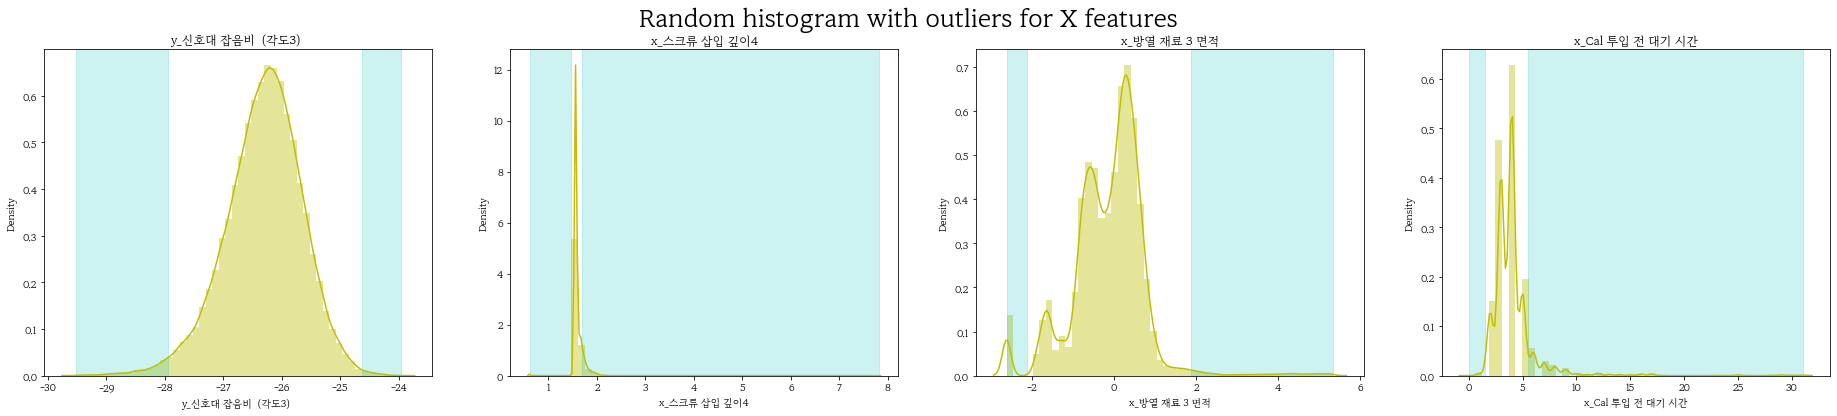

In [28]:
# 이상치 영역을 나타내는 그래프 그리기 - 랜덤하게 일부 컬럼만 지정하고 확인하기
fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(32, 6))

fig.suptitle('Random histogram with outliers for X features', fontsize=25)

rc1 = rc[0]
lower, upper = check_outlier(fm_df, rc1)

# 컬럼별 데이터 분포 확인하기
sns.distplot(fm_df.iloc[:, rc1], color = 'y', ax = ax1)

# 이상치 영역 박스 그리기
ax1.axvspan(lower, fm_df.iloc[:, rc1].min(), alpha=0.2, color='c')
ax1.axvspan(upper, fm_df.iloc[:, rc1].max(), alpha=0.2, color='c')
ax1.set_title(fm_df.columns[rc1])


rc2= rc[1]
lower, upper = check_outlier(fm_df, rc2)

sns.distplot(fm_df.iloc[:, rc2], color = 'y', ax = ax2)

ax2.axvspan(lower, fm_df.iloc[:, rc2].min(), alpha=0.2, color='c')
ax2.axvspan(upper, fm_df.iloc[:, rc2].max(), alpha=0.2, color='c')
ax2.set_title(fm_df.columns[rc2])


rc3 = rc[2]
lower, upper = check_outlier(fm_df, rc3)

sns.distplot(fm_df.iloc[:, rc3], color = 'y', ax = ax3)

ax3.axvspan(lower, fm_df.iloc[:, rc3].min(), alpha=0.2, color='c')
ax3.axvspan(upper, fm_df.iloc[:, rc3].max(), alpha=0.2, color='c')
ax3.set_title(fm_df.columns[rc3])


rc4 = rc[3]
lower, upper = check_outlier(fm_df, rc4)

sns.distplot(fm_df.iloc[:, rc4], color = 'y', ax = ax4)

ax4.axvspan(lower, fm_df.iloc[:, rc4].min(), alpha=0.2, color='c')
ax4.axvspan(upper, fm_df.iloc[:, rc4].max(), alpha=0.2, color='c')
ax4.set_title(fm_df.columns[rc4])

plt.show()

    
# 특정 컬럼들에서 이상치가 넓은 면적으로 보이는 경우 삭제 후 모델링 진행이 필요해보임. 

In [29]:
# 윈저라이징 기법으로 이상치 부분 처리 가능 (삭제 대신으로 사용할 수 있음)
# replace the outliers with other values. 
# Common is replacing the outliers on the upper side with 95% percentile value and outlier on the lower side with 5% percentile. 
# Z-score에서 표준편차가 3인 경우 일반적으로 많이 사용

from scipy.stats import mstats
for c in range(len(fm_df.columns)):
    print(fm_df.columns[c], mstats.winsorize(fm_df.iloc[:, c].values, axis=1))       

x_PCB 체결 시 단계별 누름량(Step 1) [71 70 73 ... 69 66 66]
x_방열 재료 1 무게 [0.33639147 0.26605498 0.23241588 ... 0.25076446 0.22018341 0.2813455 ]
x_PCB 체결 시 단계별 누름량(Step 3) [102 102 103 ... 103 102 102]
x_PCB 체결 시 단계별 누름량(Step 4) [75 73 73 ... 69 68 70]
x_방열 재료 1 면적 [ 0.30808089 -0.05555582 -0.01515185 ...  0.56565561  0.73737274
  0.66666602]
x_방열 재료 2 면적 [-1.97746922 -2.02065366 -0.34810384 ... -0.46676686 -0.09162609
 -0.08036048]
x_방열 재료 3 면적 [ 0.1492974  -0.01113758  0.50053058 ... -0.48236529  0.54455043
  0.55171044]
x_커넥터 위치 기준 좌표 [4.34000015 4.38000011 4.36000013 ... 4.38000011 4.32999992 4.38000011]
x_1번 안테나 패드 위치 [13.34000015 13.32999992 13.35999966 ... 13.38000011 13.35999966
 13.39000034]
x_2번 안테나 패드 위치 [13.36999989 13.32999992 13.35999966 ... 13.39000034 13.38000011
 13.38000011]
x_3번 안테나 패드 위치 [13.39999962 13.46000004 13.39000034 ... 13.47000027 13.44999981
 13.47999954]
x_4번 안테나 패드 위치 [13.52000046 13.51000023 13.51000023 ... 13.52000046 13.52000046
 13.52000046]
x_1번 스크류 삽입 깊이 [3

In [30]:
def winsorize_outliers(data):
    return mstats.winsorize(data, limits=[0.05, 0.05], axis=0, nan_policy = 'propagate')

In [31]:
print(fm_df.iloc[10])

x_PCB 체결 시 단계별 누름량(Step 1)     75.000000
x_방열 재료 1 무게                    0.370031
x_PCB 체결 시 단계별 누름량(Step 3)    102.000000
x_PCB 체결 시 단계별 누름량(Step 4)     77.000000
x_방열 재료 1 면적                    0.111111
                                 ...    
y_신호대 잡음비  (각도4)              -22.495001
y_안테나 Gain 평균 (각도4)            24.663000
y_신호대 잡음비  (각도5)              -25.725000
y_신호대 잡음비  (각도6)              -25.681000
y_신호대 잡음비  (각도7)              -25.768000
Name: 10, Length: 56, dtype: float64


In [32]:
# 최소, 최댓값 (상, 하한선 초과, 미만 값 => 윈저화값 변환)
for col in range(len(fm_df.columns[:-14])):
    lower, upper = check_outlier(fm_df, col)
    fm_df[fm_df.iloc[:, col].apply(lambda x: x<lower or x>upper)] = fm_df[fm_df.iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)
fm_df.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_스크류 체결 시 분당 회전수(평균),y_안테나 Gain 평균 (각도1),y_안테나 1 Gain 편차,y_안테나 2 Gain 편차,y_평균 신호대 잡음비,y_안테나 Gain 평균 (각도2),y_신호대 잡음비 (각도1),y_안테나 Gain 평균 (각도3),y_신호대 잡음비 (각도2),y_신호대 잡음비 (각도3),y_신호대 잡음비 (각도4),y_안테나 Gain 평균 (각도4),y_신호대 잡음비 (각도5),y_신호대 잡음비 (각도6),y_신호대 잡음비 (각도7)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,71,0.336391,102,74,0.308081,-1.441232,0.149297,4.34,13.34,13.37,13.41,13.52,3.11,3.17,3.13,2.07,2.07,2.05,2.06,2.06,2.27,1.40,1.66,1.38,1.74,-16.320000,-16.320000,-16.99,21.200001,21.000000,21.27,21.100000,-5.0,3,0.832657,0.534110,1.131925,0.868768,-0.367225,-0.141618,-0.505029,12.9375,1.886,1.456,1.615,10.502,29.632000,16.083,3.827,-25.381001,-25.528999,-22.768999,23.792,-25.469999,-25.409,-25.304001
1,70,0.266055,102,73,-0.055556,-1.441232,-0.011138,4.38,13.33,13.34,13.46,13.51,3.10,3.11,3.20,2.10,2.10,2.10,2.10,2.17,2.27,1.40,1.66,1.38,1.66,-16.059999,-16.110001,-16.74,21.160000,21.030001,21.16,21.129999,-6.0,3,0.396990,0.616845,1.179763,-0.605928,-0.030251,0.650943,-0.527542,12.9025,1.446,1.184,1.268,17.437,33.179001,16.736,3.229,-26.618999,-26.523001,-22.573999,24.691,-26.253000,-26.497,-26.438000
2,73,0.232416,103,73,-0.015152,-0.348104,-0.040838,4.36,13.36,13.36,13.40,13.51,3.09,3.04,3.12,2.07,2.06,2.04,2.07,2.10,2.26,1.42,1.69,1.39,1.68,-16.160000,-16.170000,-16.76,21.139999,21.030001,21.17,21.120001,-1.0,3,0.274259,-0.039661,1.007533,0.126871,-0.160030,0.299524,-0.921137,12.9275,1.251,0.665,0.782,14.082,31.801001,17.080,2.839,-26.238001,-26.216000,-22.169001,24.649,-26.285000,-26.215,-26.370001


In [33]:
# 윈저화가 잘 되었는지 확인하기 - 샘플
# 윈저화 이전 데이터 값과의 변화 확인가능

print(fm_df.iloc[10])

x_PCB 체결 시 단계별 누름량(Step 1)     73.000000
x_방열 재료 1 무게                    0.370031
x_PCB 체결 시 단계별 누름량(Step 3)    102.000000
x_PCB 체결 시 단계별 누름량(Step 4)     74.000000
x_방열 재료 1 면적                    0.075757
                                 ...    
y_신호대 잡음비  (각도4)              -22.495001
y_안테나 Gain 평균 (각도4)            24.663000
y_신호대 잡음비  (각도5)              -25.725000
y_신호대 잡음비  (각도6)              -25.681000
y_신호대 잡음비  (각도7)              -25.768000
Name: 10, Length: 56, dtype: float64


In [34]:
print(new_fm1.iloc[2])

x_PCB 체결 시 단계별 누름량(Step 1)     70.000000
x_방열 재료 1 무게                    0.404834
x_PCB 체결 시 단계별 누름량(Step 3)    102.000000
x_PCB 체결 시 단계별 누름량(Step 4)     77.000000
x_방열 재료 1 면적                    0.409091
x_방열 재료 2 면적                    3.576600
x_방열 재료 3 면적                   -0.264091
x_커넥터 위치 기준 좌표                  4.430000
x_1번 안테나 패드 위치                 13.320000
x_2번 안테나 패드 위치                 13.350000
x_3번 안테나 패드 위치                 13.400000
x_4번 안테나 패드 위치                 13.520000
x_1번 스크류 삽입 깊이                  3.070000
x_2번 스크류 삽입 깊이                  3.120000
x_4번 스크류 삽입 깊이                  3.170000
x_커넥터 1번 핀 치수                   2.130000
x_커넥터 2번 핀 치수                   2.100000
x_커넥터 3번 핀 치수                   2.290000
x_커넥터 4번 핀 치수                   2.150000
x_커넥터 5번 핀 치수                   2.240000
x_커넥터 6번 핀 치수                   2.260000
x_스크류 삽입 깊이1                    1.500000
x_스크류 삽입 깊이2                    1.690000
x_스크류 삽입 깊이3                    1.470000
x_스크류 삽입 깊이4    

In [35]:
# 최소, 최댓값 (상, 하한선 초과, 미만 값 => 윈저화값 변환)
for col in range(len(new_fm1.columns)):
    lower, upper = check_outlier(new_fm1, col)
    new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)] = new_fm1[new_fm1.iloc[:, col].apply(lambda x: x<lower or x>upper)].apply(winsorize_outliers)
new_fm1.head(3)

,x_PCB 체결 시 단계별 누름량(Step 1),x_방열 재료 1 무게,x_PCB 체결 시 단계별 누름량(Step 3),x_PCB 체결 시 단계별 누름량(Step 4),x_방열 재료 1 면적,x_방열 재료 2 면적,x_방열 재료 3 면적,x_커넥터 위치 기준 좌표,x_1번 안테나 패드 위치,x_2번 안테나 패드 위치,x_3번 안테나 패드 위치,x_4번 안테나 패드 위치,x_1번 스크류 삽입 깊이,x_2번 스크류 삽입 깊이,x_4번 스크류 삽입 깊이,x_커넥터 1번 핀 치수,x_커넥터 2번 핀 치수,x_커넥터 3번 핀 치수,x_커넥터 4번 핀 치수,x_커넥터 5번 핀 치수,x_커넥터 6번 핀 치수,x_스크류 삽입 깊이1,x_스크류 삽입 깊이2,x_스크류 삽입 깊이3,x_스크류 삽입 깊이4,x_하우징 PCB 안착부 1 치수,x_하우징 PCB 안착부 2 치수,x_하우징 PCB 안착부 3 치수,x_레이돔 치수 (안테나 1번 부위),x_레이돔 치수 (안테나 2번 부위),x_레이돔 치수 (안테나 3번 부위),x_레이돔 치수 (안테나 4번 부위),x_실란트 본드 소요량,x_Cal 투입 전 대기 시간,x_RF1 부분 SMT 납 량,x_RF2 부분 SMT 납 량,x_RF3 부분 SMT 납 량,x_RF4 부분 SMT 납 량,x_RF5 부분 SMT 납 량,x_RF6 부분 SMT 납 량,x_RF7 부분 SMT 납 량,x_스크류 체결 시 분당 회전수(평균)
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,69,0.637462,102,74,0.843435,-2.030975,0.064964,4.37,13.38,13.40,13.50,13.53,3.27,3.32,3.39,2.17,2.14,2.15,2.16,2.18,2.22,1.38,1.53,1.34,1.53,-16.17,-16.170000,-16.84,21.219999,21.059999,21.209999,21.200001,0.0,4,0.977048,-0.263632,0.348028,0.735984,0.232383,-0.567134,-0.983849,12.9400
1,67,0.416919,102,68,-0.409091,0.076946,-0.604128,4.36,13.35,13.38,13.45,13.52,3.26,3.30,3.34,2.11,2.10,2.10,2.10,2.17,2.20,1.36,1.56,1.34,1.55,-15.35,-15.270000,-16.01,21.209999,21.000000,21.260000,21.150000,-7.0,4,0.714757,-0.421086,0.879698,0.430763,0.630864,-0.508574,-0.638611,12.9275
2,70,0.404834,102,74,0.409091,3.576600,-0.264091,4.40,13.33,13.35,13.41,13.52,3.10,3.12,3.17,2.13,2.10,2.14,2.15,2.18,2.26,1.40,1.66,1.38,1.71,-16.26,-16.280001,-16.91,21.160000,21.049999,21.150000,21.190001,0.0,4,-1.043935,-1.039937,-0.787284,-0.992419,0.282594,-1.015205,-1.169154,12.9650


In [36]:
print(new_fm1.iloc[2])
# row index = 2인 데이터 확인하면 바뀐 것을 확인할 수 있음

x_PCB 체결 시 단계별 누름량(Step 1)     70.000000
x_방열 재료 1 무게                    0.404834
x_PCB 체결 시 단계별 누름량(Step 3)    102.000000
x_PCB 체결 시 단계별 누름량(Step 4)     74.000000
x_방열 재료 1 면적                    0.409091
x_방열 재료 2 면적                    3.576600
x_방열 재료 3 면적                   -0.264091
x_커넥터 위치 기준 좌표                  4.400000
x_1번 안테나 패드 위치                 13.330000
x_2번 안테나 패드 위치                 13.350000
x_3번 안테나 패드 위치                 13.410000
x_4번 안테나 패드 위치                 13.520000
x_1번 스크류 삽입 깊이                  3.100000
x_2번 스크류 삽입 깊이                  3.120000
x_4번 스크류 삽입 깊이                  3.170000
x_커넥터 1번 핀 치수                   2.130000
x_커넥터 2번 핀 치수                   2.100000
x_커넥터 3번 핀 치수                   2.140000
x_커넥터 4번 핀 치수                   2.150000
x_커넥터 5번 핀 치수                   2.180000
x_커넥터 6번 핀 치수                   2.260000
x_스크류 삽입 깊이1                    1.400000
x_스크류 삽입 깊이2                    1.660000
x_스크류 삽입 깊이3                    1.380000
x_스크류 삽입 깊이4    

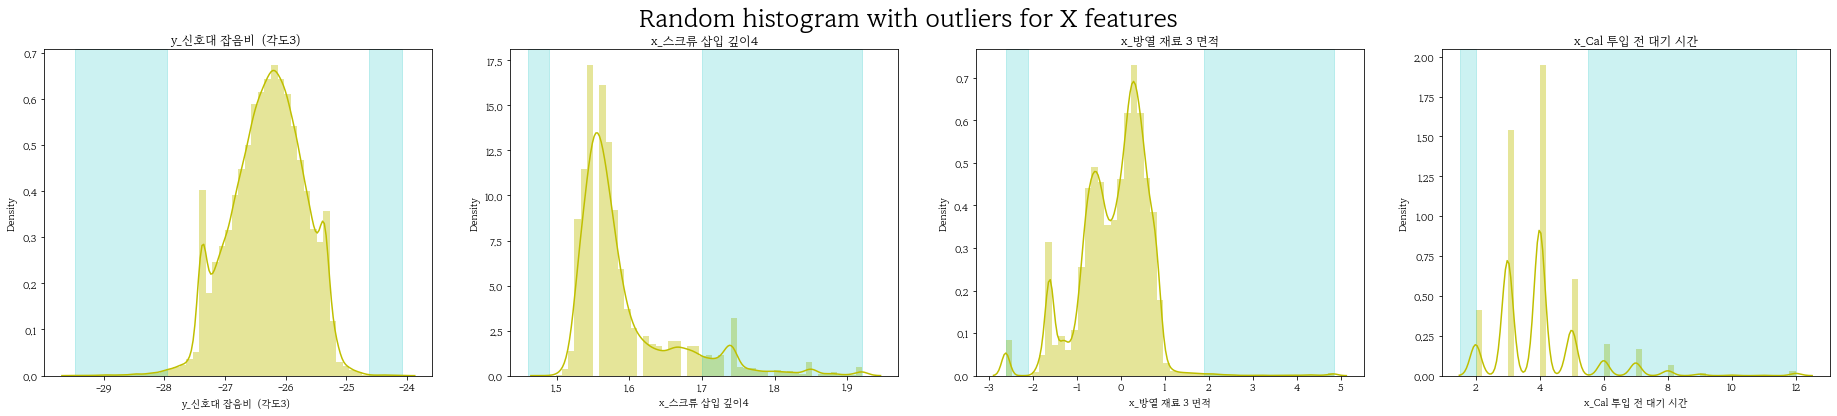

In [37]:
# 이상치 영역을 나타내는 그래프 그리기 - 랜덤하게 선별한 4개의 컬럼에 대해 다시 윈저화 후 이상치 영역 확인

fig, (ax1, ax2, ax3, ax4)= plt.subplots(1, 4, figsize=(32, 6))

fig.suptitle('Random histogram with outliers for X features', fontsize=25)

rc1 = rc[0]
lower, upper = check_outlier(fm_df, rc1)

# 컬럼별 데이터 분포 확인하기
sns.distplot(fm_df.iloc[:, rc1], color = 'y', ax = ax1)

# 이상치 영역 박스 그리기
ax1.axvspan(lower, fm_df.iloc[:, rc1].min(), alpha=0.2, color='c')
ax1.axvspan(upper, fm_df.iloc[:, rc1].max(), alpha=0.2, color='c')
ax1.set_title(fm_df.columns[rc1])


rc2= rc[1]
lower, upper = check_outlier(fm_df, rc2)

sns.distplot(fm_df.iloc[:, rc2], color = 'y', ax = ax2)

ax2.axvspan(lower, fm_df.iloc[:, rc2].min(), alpha=0.2, color='c')
ax2.axvspan(upper, fm_df.iloc[:, rc2].max(), alpha=0.2, color='c')
ax2.set_title(fm_df.columns[rc2])


rc3 = rc[2]
lower, upper = check_outlier(fm_df, rc3)

sns.distplot(fm_df.iloc[:, rc3], color = 'y', ax = ax3)

ax3.axvspan(lower, fm_df.iloc[:, rc3].min(), alpha=0.2, color='c')
ax3.axvspan(upper, fm_df.iloc[:, rc3].max(), alpha=0.2, color='c')
ax3.set_title(fm_df.columns[rc3])


rc4 = rc[3]
lower, upper = check_outlier(fm_df, rc4)

sns.distplot(fm_df.iloc[:, rc4], color = 'y', ax = ax4)

ax4.axvspan(lower, fm_df.iloc[:, rc4].min(), alpha=0.2, color='c')
ax4.axvspan(upper, fm_df.iloc[:, rc4].max(), alpha=0.2, color='c')
ax4.set_title(fm_df.columns[rc4])

plt.show()


# RF 모델로 성능확인하기

In [38]:
import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

In [39]:
train_x.shape, train_y.shape

((39607, 42), (39607, 14))

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 42), (7922, 42), (31685, 14), (7922, 14))

In [41]:
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

seed_everything(2022)
lgb_model = LGBMRegressor(max_depth= 30, n_estimators= 50, learning_rate =0.01, random_state=2022)
print(lgb_model)


model = MultiOutputRegressor(lgb_model).fit(X_train, y_train)
print('Done.')

LGBMRegressor(learning_rate=0.01, max_depth=30, n_estimators=50,
              random_state=2022)
Done.


In [42]:
from sklearn.metrics import mean_squared_error

# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of stacking (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of stacking (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of stacking (training): 1.98
lg_nrmse of stacking (validation): 1.966
y MSE(train):1.4601
y MSE(val):1.4471
Done.


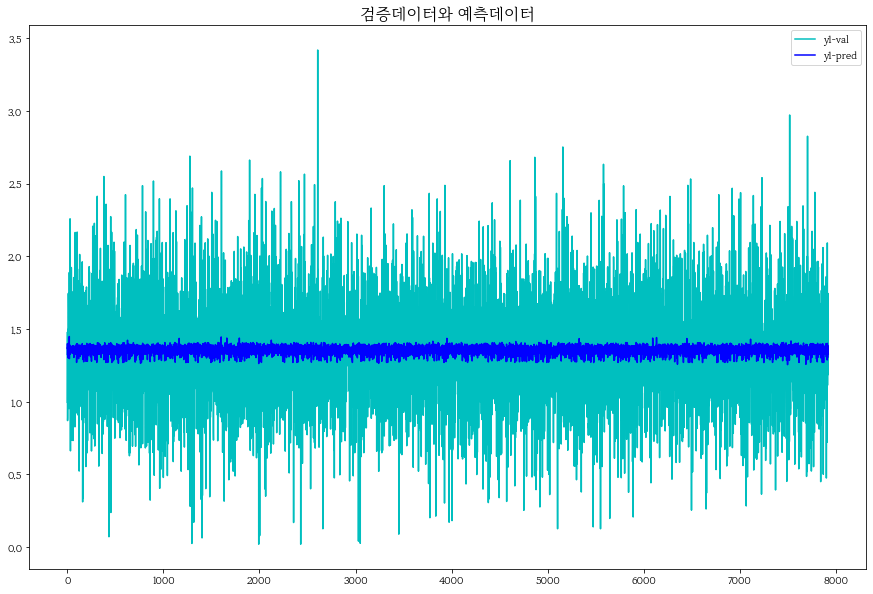

In [43]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

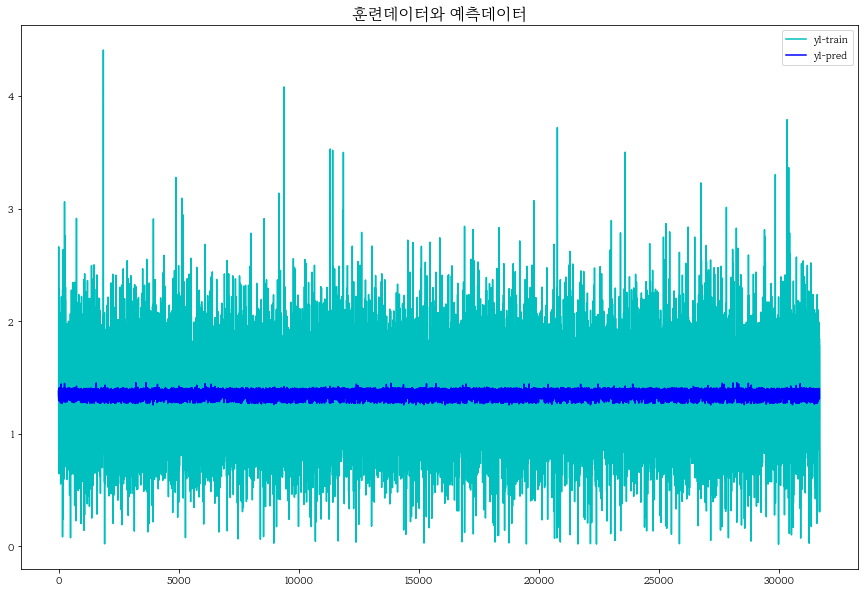

In [44]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [45]:
train_x = fm_df.drop(columns = fm_df.filter(regex='y').columns, axis=1)
train_y = fm_df.filter(regex='y')

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 42), (7922, 42), (31685, 14), (7922, 14))

In [46]:
from sklearn.ensemble import BaggingRegressor
from sklearn.multioutput import MultiOutputRegressor
bgr_model = BaggingRegressor(n_estimators= 50, n_jobs = 5, random_state=2022)
print(bgr_model)

model = MultiOutputRegressor(bgr_model).fit(X_train, y_train)
print('Done.')

BaggingRegressor(n_estimators=50, n_jobs=5, random_state=2022)
Done.


In [47]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of stacking (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of stacking (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of stacking (training): 0.682
lg_nrmse of stacking (validation): 1.788
y MSE(train):0.1673
y MSE(val):1.1696
Done.


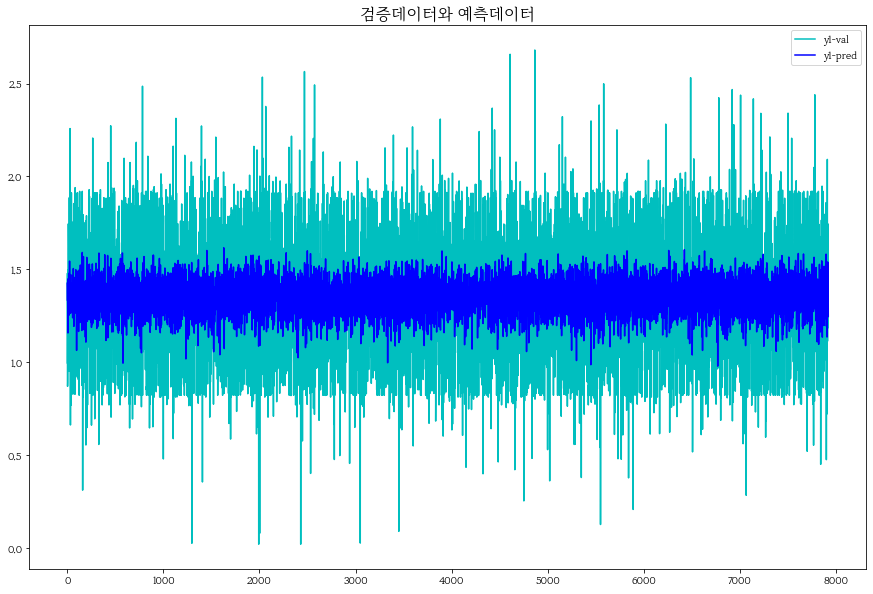

In [48]:
# 검증데이터에 대한 예측 결과  그래프를 통해 확인하기 - 첫번째 컬럼인 안테나 Gain 평균 (각도1)에 대하여 확인하기

plt.figure(figsize=(15, 10))
x_ax = range(len(X_val))
plt.plot(x_ax, y_val.iloc[:,0], label="y1-val", color='c') 
plt.plot(x_ax, preds_val[:,0], label="y1-pred", color='b')
plt.title("검증데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

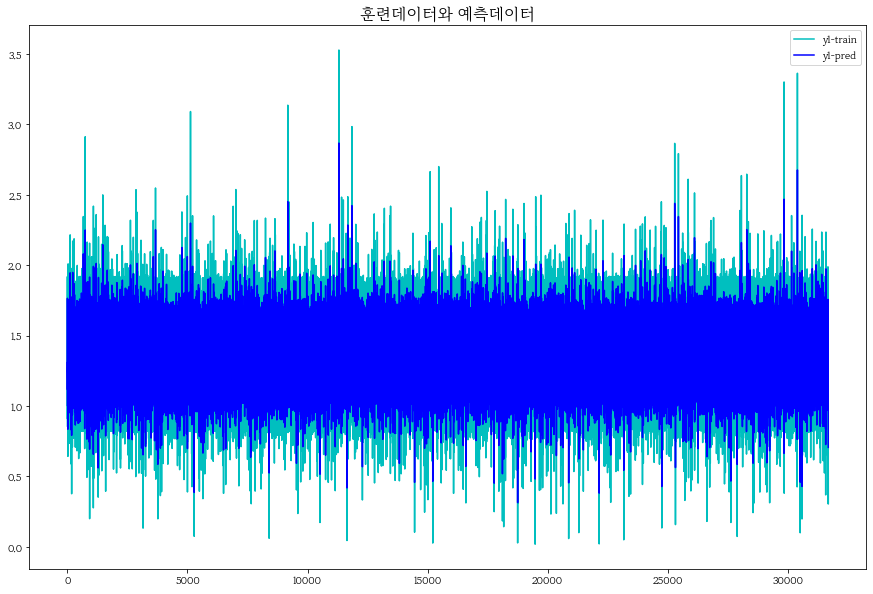

In [49]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [50]:
train_x = fm_df.drop(columns = fm_df.filter(regex='y').columns, axis=1)
train_y = fm_df.filter(regex='y')

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31685, 42), (7922, 42), (31685, 14), (7922, 14))

In [51]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor,ExtraTreesRegressor, StackingRegressor

bgr = BaggingRegressor(n_estimators= 30, random_state=2022) 
lgbmr = LGBMRegressor(max_depth= 15, n_estimators= 30, learning_rate =0.01, random_state=2022)
etr = ExtraTreesRegressor(n_estimators= 30, random_state=2022, criterion='mse', max_depth=15)

In [52]:
from sklearn.multioutput import MultiOutputRegressor

seed_everything(2022)
estimators = [('br',bgr),('lgb',lgbmr),('etr',etr)]
stacking = StackingRegressor(estimators=estimators, final_estimator=etr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [53]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of stacking (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of stacking (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of stacking (training): 1.439
lg_nrmse of stacking (validation): 1.777
y MSE(train):0.7143
y MSE(val):1.1584
Done.


In [57]:
# 차원 축소 후 데이터 결과 비교하기
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

# 차원 축소
train_pca = pca.fit_transform(train_x)
print("pca 전 데이터:", train_x.shape)
print("pca 후 데이터:", train_pca.shape)

pca 전 데이터: (39607, 42)
pca 후 데이터: (39607, 4)


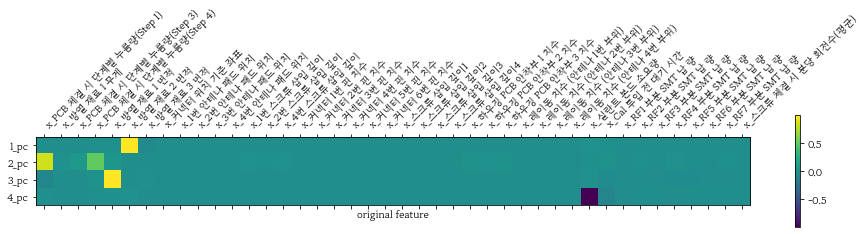

In [60]:
plt.matshow(pca.components_) #heatmap

plt.xticks(range(len(train_x.columns)), train_x.columns, rotation=45, ha = 'left')
plt.yticks([0, 1, 2, 3], ["1_pc", "2_pc", "3_pc", "4_pc"])

plt.xlabel("original feature")
plt.colorbar()
plt.show()

In [61]:
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)

seed_everything(2022)
estimators = [('br',bgr),('lgb',lgbmr),('etr',etr)]
stacking = StackingRegressor(estimators=estimators, final_estimator=etr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [62]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of stacking (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of stacking (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of stacking (training): 1.745
lg_nrmse of stacking (validation): 1.81
y MSE(train):1.0451
y MSE(val):1.2029
Done.


In [63]:
# 차원 축소 후 데이터 결과 비교하기
pca = PCA(n_components=2)

# 차원 축소
train_pca = pca.fit_transform(train_x)
print("pca 후 데이터:", train_pca.shape)

pca 후 데이터: (39607, 2)


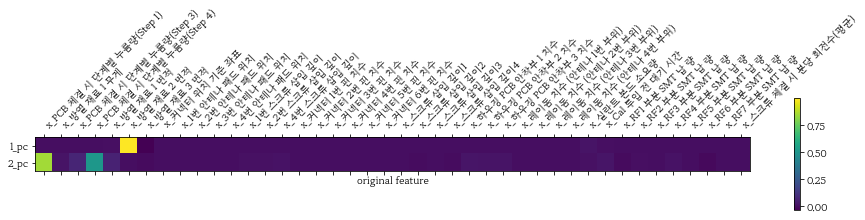

In [64]:
plt.matshow(pca.components_) #heatmap

plt.xticks(range(len(train_x.columns)), train_x.columns, rotation=45, ha = 'left')
plt.yticks([0, 1], ["1_pc", "2_pc"])

plt.xlabel("original feature")
plt.colorbar()
plt.show()

In [83]:
high_corr_nan = train_x.corr()[train_x.corr() >= np.abs(0.7)].isnull().sum()
# train_x.corr()[high_corr_nan < 41]

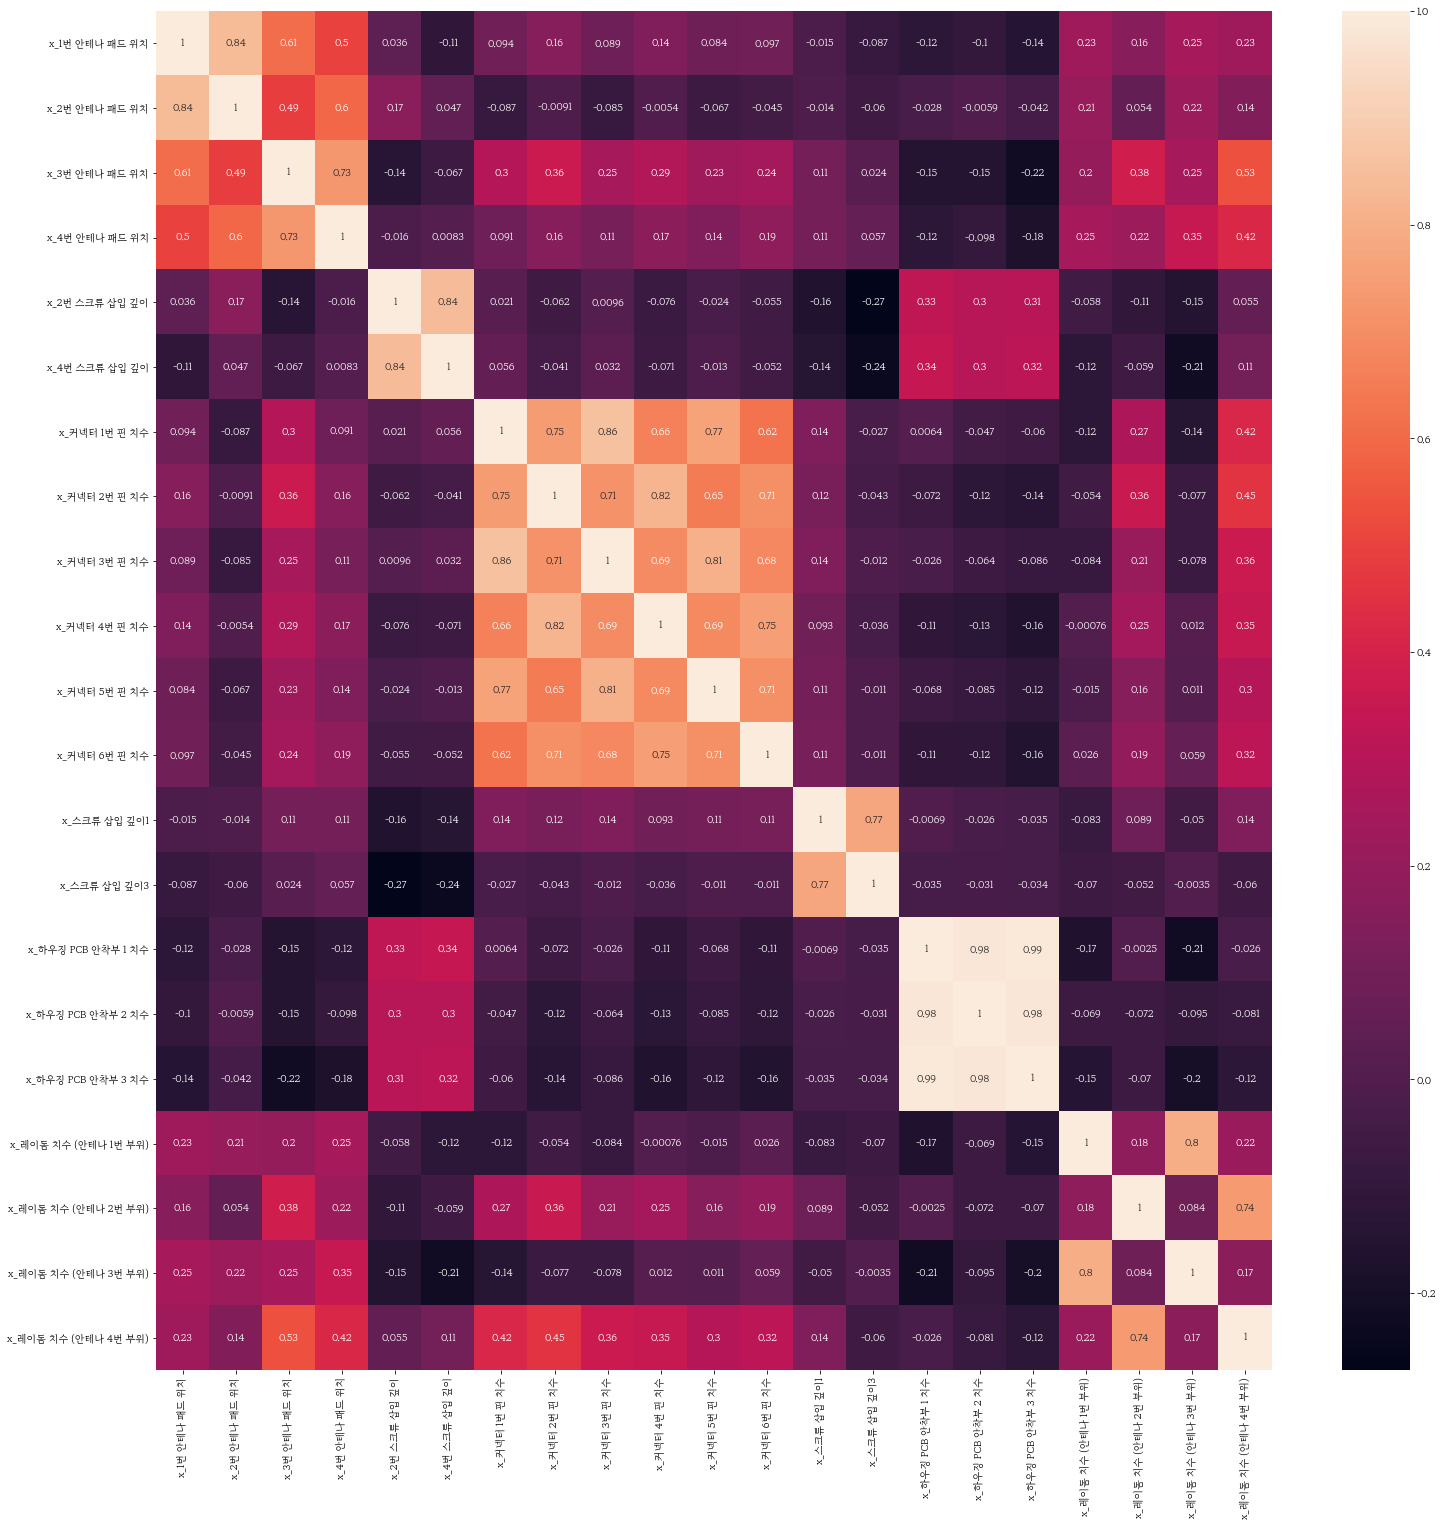

In [89]:
%matplotlib inline

mask = np.zeros_like(train_x[high_corr_nan[high_corr_nan < 41].index].corr())
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(25,25))
sns.heatmap(train_x[high_corr_nan[high_corr_nan < 41].index].corr(), annot=True)
plt.show()

In [90]:
X_train, X_val, y_train, y_val = train_test_split(train_pca, train_y, test_size=0.2, random_state=seed_everything(2022), shuffle=True)

seed_everything(2022)
estimators = [('br',bgr),('lgb',lgbmr),('etr',etr)]
stacking = StackingRegressor(estimators=estimators, final_estimator=etr, cv = 5, passthrough = True, n_jobs=5)
model = MultiOutputRegressor(stacking).fit(X_train, y_train)
print('Done.')

Done.


In [91]:
# 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
preds_tr = model.predict(X_train)
preds_val = model.predict(X_val)

print(f'lg_nrmse score of stacking (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
print(f'lg_nrmse of stacking (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
print('Done.')

lg_nrmse score of stacking (training): 1.805
lg_nrmse of stacking (validation): 1.825
y MSE(train):1.2079
y MSE(val):1.2223
Done.


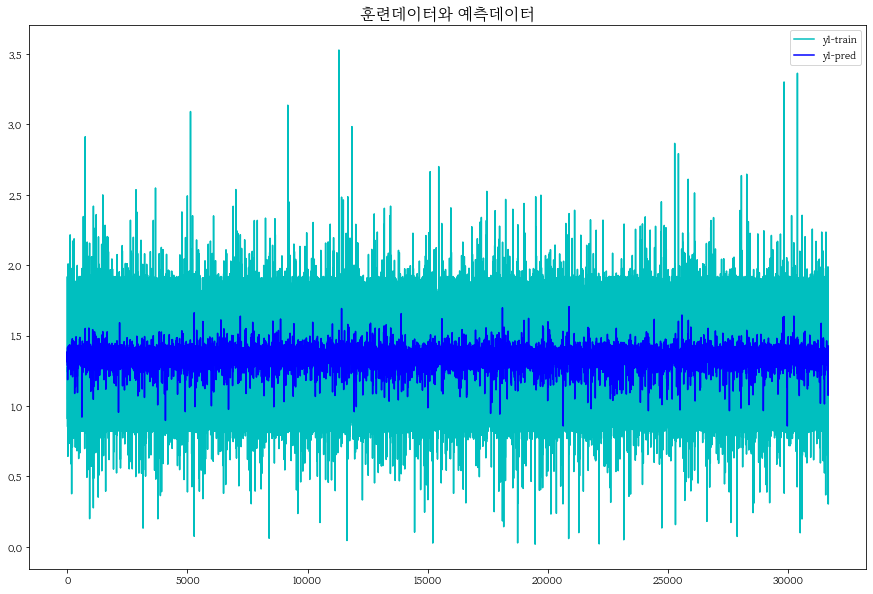

In [92]:
plt.figure(figsize=(15, 10))
x_ax = range(len(X_train))
plt.plot(x_ax, y_train.iloc[:,0], label="y1-train", color='c') 
plt.plot(x_ax, preds_tr[:,0], label="y1-pred", color='b')
plt.title("훈련데이터와 예측데이터", fontsize=16)
plt.legend()
plt.show()

In [54]:
# # 평가 데이터로 데이터 예측하기

# preds_test = model.predict(new_fm1)

# submission = pd.read_csv('./sample_submission.csv')

# for idx, col in enumerate(submission.columns):
#     if col=='ID': continue#submission[col] = new_fm1.index
#     submission[col] = preds_test[:,idx-1]

# submission.to_csv('./submit_outliers_stacking2.csv', index=False, encoding='utf-8')
# print('Done.')

# pd.read_csv('./submit_outliers_stacking2.csv')

In [55]:
# df = pd.read_csv('./submit_outliers_stacking2.csv')

# train_x = new_fm1
# train_y = df.filter(regex='Y')
# X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.3, random_state=seed_everything(2022), shuffle=True)

# seed_everything(2022)
# bgr_model = BaggingRegressor(n_estimators= 50, n_jobs = 5, random_state=2022)
# print(bgr_model)

# model = MultiOutputRegressor(bgr_model).fit(X_train, y_train)
# print('Done.')

In [56]:
# # 검증데이터 및 mse 성능/데이콘 평가 점수 확인하기
# preds_tr = model.predict(X_train)
# preds_val = model.predict(X_val)

# from sklearn.metrics import mean_squared_error
# print(f'lg_nrmse score of bagging (training): {round(lg_nrmse(y_train.values, preds_tr), 3)}')
# print(f'lg_nrmse of bagging (validation): {round(lg_nrmse(y_val.values, preds_val), 3)}')
# print("y MSE(train):%.4f" % mean_squared_error(y_train, preds_tr))
# print("y MSE(val):%.4f" % mean_squared_error(y_val, preds_val))
# print('Done.')